# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op
import pickle

# Data Fetching

In [2]:
A1=np.empty((0,5),dtype='float32')
U1=np.empty((0,7),dtype='float32')
node=['150','149','147','144','142','140','136','61']
mon=['Apr','Mar','Aug','Jun','Jul','Sep','May','Oct']
for j in node:
  for i in mon:
    inp= pd.read_csv('../data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[1,2,3,15,16],low_memory=False)
    out= pd.read_csv('../data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[5,6,7,8,17,18,19],low_memory=False)
    
    inp=np.array(inp,dtype='float32')
    out=np.array(out,dtype='float32')
    
    A1=np.append(A1, inp, axis=0)
    U1=np.append(U1, out, axis=0)

print(A1)
print(U1)


[[1.50000e+02 1.90401e+05 7.25000e+02 2.75500e+01 8.03900e+01]
 [1.50000e+02 1.90401e+05 8.25000e+02 2.75600e+01 8.03300e+01]
 [1.50000e+02 1.90401e+05 9.25000e+02 2.75800e+01 8.02400e+01]
 ...
 [6.10000e+01 1.91020e+05 1.94532e+05 2.93700e+01 7.52100e+01]
 [6.10000e+01 1.91020e+05 1.94632e+05 2.93500e+01 7.52700e+01]
 [6.10000e+01 1.91020e+05 1.94732e+05 2.93400e+01 7.53000e+01]]
[[ 28.     3.   -52.   ...  16.97  19.63  20.06]
 [ 28.    15.   -53.   ...  16.63  19.57  23.06]
 [ 31.    16.   -55.   ...  17.24  19.98  20.24]
 ...
 [ 76.    12.   -76.   ...   3.47   3.95   4.35]
 [ 75.    13.   -76.   ...   3.88   4.33   4.42]
 [ 76.    12.   -75.   ...   3.46   4.07   4.28]]


# Min Max Scaler

In [3]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(A1)
Y1=scaler_obj.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

# Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

def hyperparameterRF(x_train,y_train):
    random_grid = {'bootstrap': [True, False],
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }
    rf = RandomForestRegressor()
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)

    grid_result = MultiOutputRegressor(rf_random).fit(x_train, y_train)
    
    return grid_result.estimators_[0].best_params_
    

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.5,random_state=0)

params=hyperparameterRF(x_train,y_train)
params

# Model

In [8]:
# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.25,random_state=42)

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

model2=MultiOutputRegressor(RandomForestRegressor(max_depth=10,n_estimators=100, random_state=0))

#training the model
model_fit2=model2.fit(x_train,y_train)
print("Model training is Done!!")

filename2 = 'randomforest.sav'
pickle.dump(model_fit2, open(filename2, 'wb'))

Model training is Done!!


# Error Analysis

In [9]:
from sklearn import metrics
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

#finding out the r2 score
y_train_pred2=model2.predict(x_train)
r2_train2=r2_score(y_train,y_train_pred2,multioutput='variance_weighted')

y_test_pred2=model2.predict(x_test)
r2_test2=r2_score(y_test,y_test_pred2,multioutput='variance_weighted')

print('r2 score on train data '+str(r2_train2))
print('r2 score on test data '+ str(r2_test2))

rf_mae=metrics.mean_absolute_error(y_test, y_test_pred2)
rf_mse=metrics.mean_squared_error(y_test, y_test_pred2)
rf_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2))
print('Mean Absolute Error:',rf_mae)
print('Mean Squared Error:',rf_mse )
print('Root Mean Squared Error:',rf_rmse)

r2 score on train data 0.6024441613305692
r2 score on test data 0.6025078002605496
Mean Absolute Error: 0.0021928648657524178
Mean Squared Error: 5.4943812238677005e-05
Root Mean Squared Error: 0.0074124093410089685


In [11]:
import pickle
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.25,random_state=42)
loaded_model_fit7 = pickle.load(open("randomforest.sav", 'rb'))
y_test_pred=loaded_model_fit7.predict(x_test)
print("Predicted :\n",y_test_pred)
print("\n")
r2_test=r2_score(y_test,y_test_pred,multioutput='variance_weighted')
print("R2 Score : ",r2_test)

Predicted :
 [[0.0001155  0.06553684 0.00011044 ... 0.00232374 0.00155629 0.00064465]
 [0.00010984 0.0655369  0.00012271 ... 0.03560274 0.02111897 0.00731455]
 [0.00011143 0.06553675 0.00011892 ... 0.00986525 0.00662617 0.00257986]
 ...
 [0.00011101 0.06553665 0.00011574 ... 0.05896347 0.03832652 0.01217047]
 [0.00011589 0.06553693 0.00010926 ... 0.01282548 0.00760914 0.00254442]
 [0.00011094 0.06553658 0.00012035 ... 0.01058295 0.00747768 0.00295622]]


R2 Score :  0.6025078002605496


# y-test vs y-predict

Y_Test: [[0.00011559 0.06553685 0.00011085 ... 0.0021448  0.0014142  0.00052142]
 [0.00011088 0.06553695 0.00012144 ... 0.01090628 0.00639894 0.00234271]
 [0.0001138  0.06553686 0.00011756 ... 0.02938369 0.01855402 0.00761428]
 ...
 [0.00011103 0.06553663 0.00011547 ... 0.05674056 0.03595096 0.01243099]
 [0.00011477 0.06553688 0.00010965 ... 0.00815022 0.00468672 0.00148292]
 [0.00010879 0.06553657 0.00012025 ... 0.00375339 0.00246608 0.00081172]]
Y_Test_Predict: [[0.0001155  0.06553684 0.00011044 ... 0.00232374 0.00155629 0.00064465]
 [0.00010984 0.0655369  0.00012271 ... 0.03560274 0.02111897 0.00731455]
 [0.00011143 0.06553675 0.00011892 ... 0.00986525 0.00662617 0.00257986]
 ...
 [0.00011101 0.06553665 0.00011574 ... 0.05896347 0.03832652 0.01217047]
 [0.00011589 0.06553693 0.00010926 ... 0.01282548 0.00760914 0.00254442]
 [0.00011094 0.06553658 0.00012035 ... 0.01058295 0.00747768 0.00295622]]


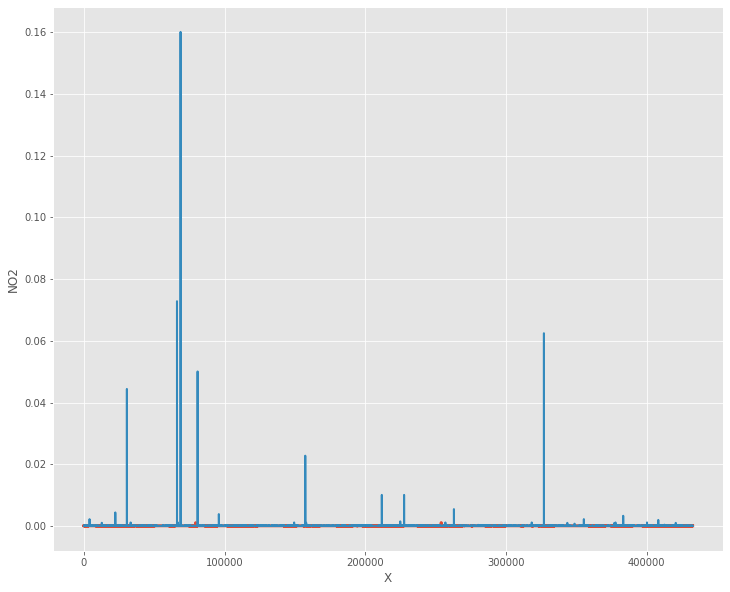

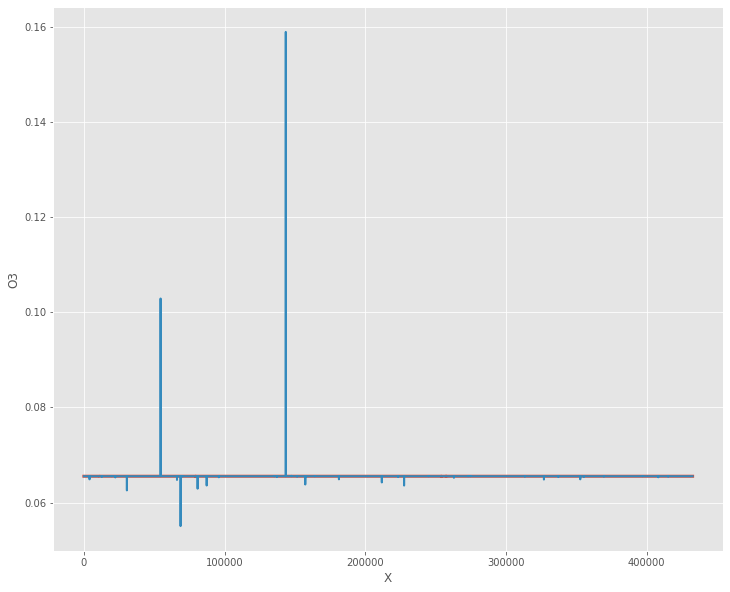

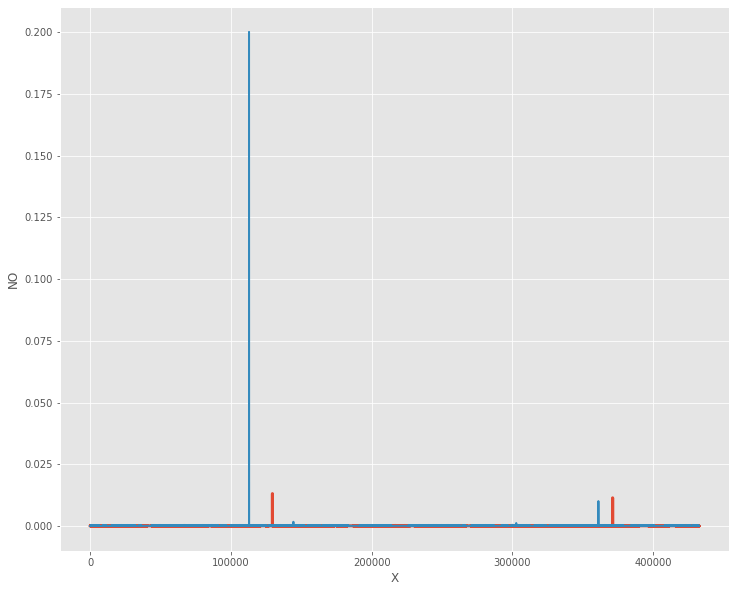

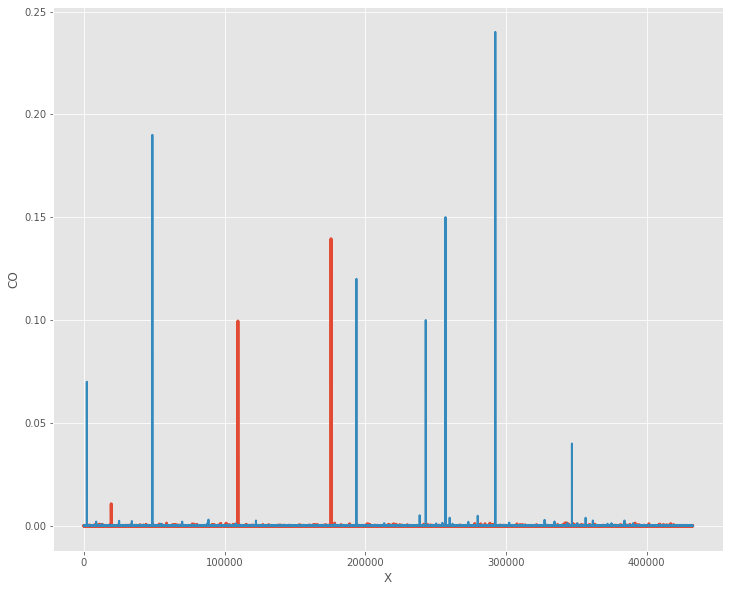

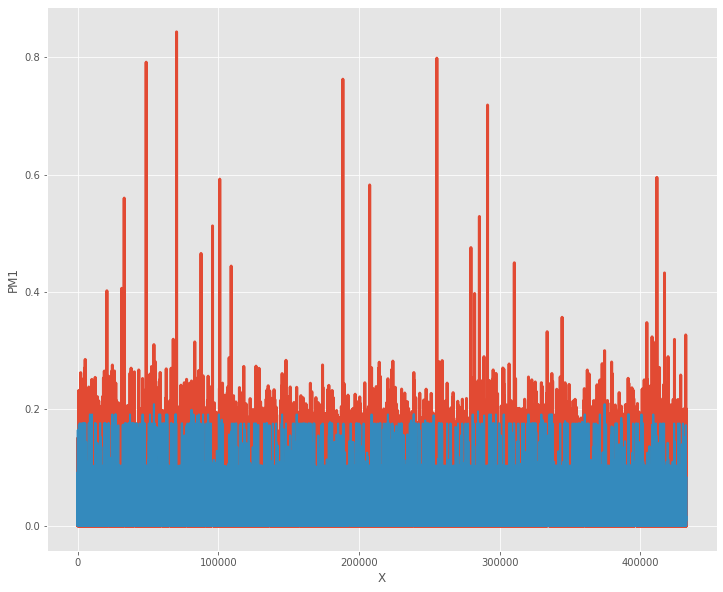

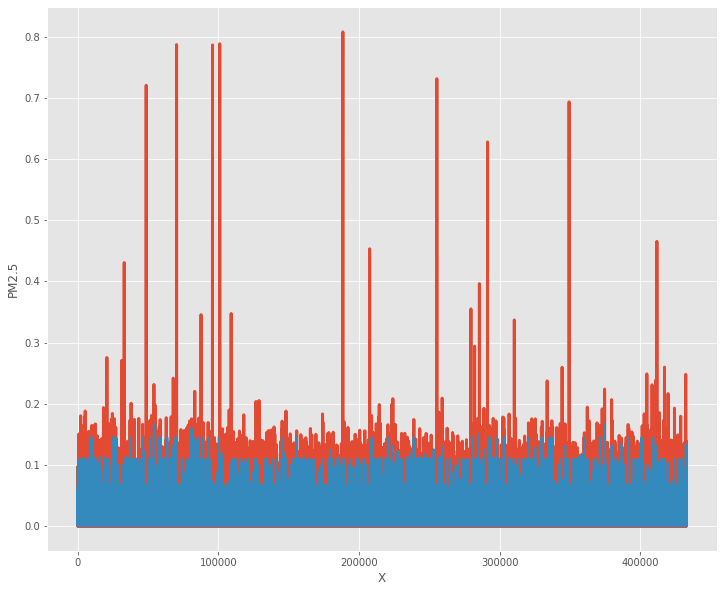

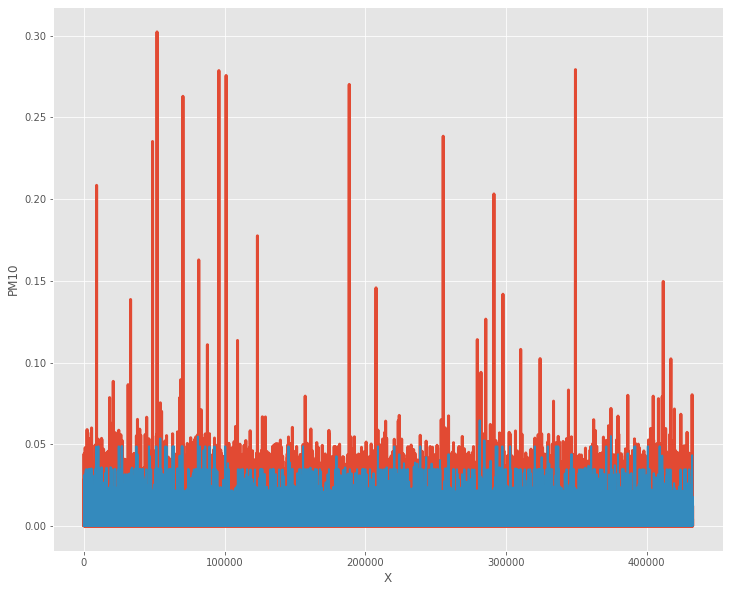

In [10]:
# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred2)

from matplotlib import style

style.use('ggplot')
for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:,i],linewidth=3, markersize=12)
  plt.plot(y_test_pred2[:,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()